In [1]:
import tensorflow as tf
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data() 

170508288/170498071 [==============================] - 11s 0us/step


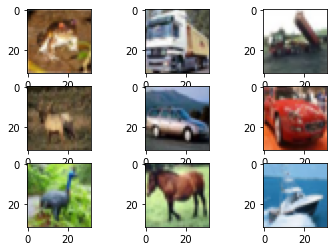

In [2]:
# Show first 9 elements of dataset

import matplotlib.pyplot as plt

for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(X_train[i])
# show the figure
plt.show()

In [3]:
X_train.shape

(50000, 32, 32, 3)

50,000 pictures (32x32 pixels), 3 channels (RGB)

In [4]:
# Normalize data
from keras.utils import np_utils
"""
X_train = X_train/255
X_test = X_test/255
"""

num_classes = 10 # 10 different classifications
batch_size = 32

# Normalize data values from 0 t0 1

y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train  /= 255
X_test /= 255


### Multi-Layer Perceptron

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 3072)              0         
                                                                 
 dense_11 (Dense)            (None, 128)               393344    
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_12 (Dense)            (None, 10)                1290      
                                                                 
Total params: 394,634
Trainable params: 394,634
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
1563/1563 [==============================] - 7s 4ms/step - loss: 1.9285 - accuracy: 0.3060 - val_loss: 1.7677 - val_accuracy: 0.3809
Epoch 2/25
1563/1563 [==============

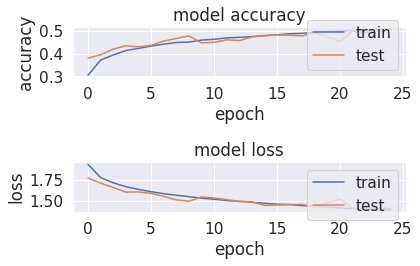

Accuracy: 50.54%


In [13]:
# Design Multi-Layer Perceptron model

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from keras.layers import Dropout
from keras import optimizers

def mlp_model():

  model = Sequential()
  model.add(Flatten(input_shape=X_train.shape[1:]))
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(10))
  loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
  
  model.compile(optimizer='SGD',
                 loss=loss_fn,
                 metrics=['accuracy'])
  return model
  
mlp_m = mlp_model()
mlp_m.summary()

mlp_model = mlp_m.fit(X_train, y_train, epochs=25, validation_data=(X_test, y_test))

# Learning curves
def print_learning_curve(model):
  plt.subplot(2,1,1)
  plt.plot(model.history['accuracy'])
  plt.plot(model.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='lower right')
  plt.subplot(2,1,2)
  plt.plot(model.history['loss'])
  plt.plot(model.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper right')
  plt.tight_layout()
  plt.show()

print_learning_curve(mlp_model)

scores = mlp_m.evaluate(X_test, y_test, verbose=0)

print("Accuracy: %.2f%%" % (scores[1]*100))

313/313 - 1s - 568ms/epoch - 2ms/step
0 1000
1 1000
2 1000
3 1000
4 1000
5 1000
6 1000
7 1000
8 1000
9 1000
[[542  30 104  12  24  13  18  29 193  35]
 [ 43 538  19  19  16  13  14  30 129 179]
 [ 78  18 446  58 128  65  93  68  29  17]
 [ 39   9 138 313  53 178 125  59  41  45]
 [ 58  10 205  43 404  33 114  89  32  12]
 [ 21   8 139 180  61 349  80  93  42  27]
 [ 12  10 115  70 112  38 577  22  25  19]
 [ 49   5  86  56  74  56  23 583  28  40]
 [104  42  25  16  15  24   7  11 713  43]
 [ 47 122  26  29  13  17  23  49 112 562]]


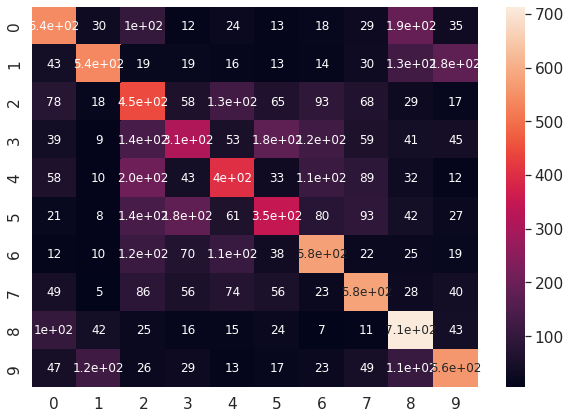

In [6]:
# Confusion matrix
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sn
import pandas  as pd

def print_cf(model):
  Y_pred = model.predict(X_test, verbose=2)
  y_pred = np.argmax(Y_pred, axis=1)
  for ix in range(10):
    print(ix, confusion_matrix(np.argmax(y_test,axis=1),y_pred)[ix].sum())
  cm = confusion_matrix(np.argmax(y_test,axis=1),y_pred)
  print(cm)

  # Visualizing of confusion matrix


  df_cm = pd.DataFrame(cm, range(10),
                    range(10))
  plt.figure(figsize = (10,7))
  sn.set(font_scale=1.4)#for label size
  sn.heatmap(df_cm, annot=True,annot_kws={"size": 12})# font size
  plt.show()

print_cf(mlp_m)

### Convolutional Neural Network

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 dropout_1 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 dropout_2 (Dropout)         (None, 16, 16, 64)        0         
                                                      

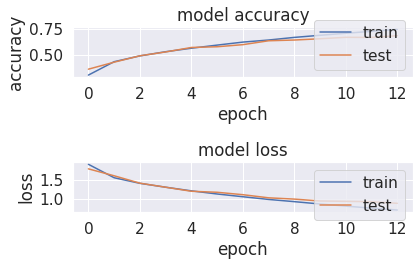

Accuracy: 68.79%


In [7]:
# Design Convolutional Neural Network
from keras.layers.convolutional import Conv2D
from keras.layers import Activation
from keras.layers.convolutional import MaxPooling2D
from tensorflow.keras.optimizers import SGD, Adam

def cnn_model():
  
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
  model.add(Dropout(0.3))

  model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
  model.add(MaxPooling2D((2, 2)))

  model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(Dropout(0.3))

  model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  
  model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
 
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  # compile model
  opt = SGD(learning_rate=0.001, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

cnn_n = cnn_model()
cnn_n.summary()

# Fit model

cnn = cnn_n.fit(X_train, y_train, epochs=13, validation_data=(X_test,y_test),shuffle=True)\

# Learning curves
print_learning_curve(cnn)

scores = cnn_n.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))


313/313 - 2s - 2s/epoch - 5ms/step
0 1000
1 1000
2 1000
3 1000
4 1000
5 1000
6 1000
7 1000
8 1000
9 1000
[[755  20  43  17  16  12  14   8  90  25]
 [ 26 794  14  26   4   7  11   4  40  74]
 [ 69   4 597  61  71  75  66  41  13   3]
 [ 15   7  82 479  75 219  56  41  10  16]
 [ 24   2  90  62 596  57  69  84  13   3]
 [ 11   3  60 149  46 621  25  80   3   2]
 [  8   6  33  70  33  45 776  14   8   7]
 [ 12   5  35  40  65  66  14 755   3   5]
 [ 72  29  22  16   6   7   8   5 814  21]
 [ 42 104  14  25  10  16  19  27  51 692]]


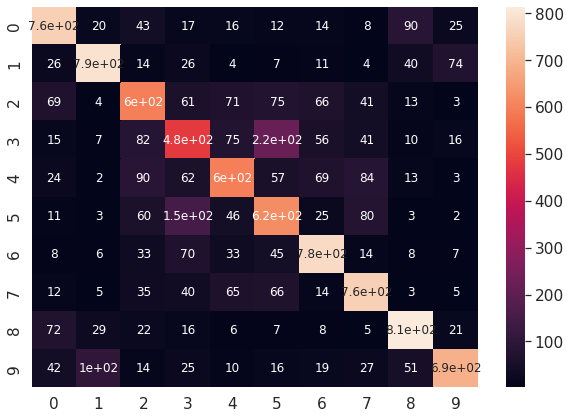

In [8]:
# Confusion matrix
print_cf(cnn_n)

### Transfer Learning

80150528/80134624 [==============================] - 3s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 1, 1, 512)         20024384  
                                                                 
 flatten_2 (Flatten)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                       

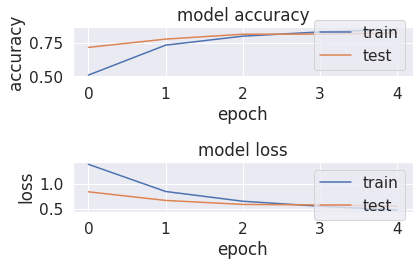

Accuracy: 82.36%


In [9]:
# Built Transfer Learning Model 1 (VGG)
from keras.applications.vgg19 import VGG19

def vgg_model():
  
  vgg_model = VGG19(include_top=False,weights='imagenet',input_shape=(32,32,3),classes=y_train.shape[1])

  model = Sequential()

  model.add(vgg_model)
  model.add(Flatten())
  
  model.add(Dense(256,activation=('relu'), input_dim=512))
  model.add(Dropout(0.4))

  model.add(Dense(128,activation=('relu')))
  model.add(Dropout(0.3))

  model.add(Dense(64,activation=('relu')))
  model.add(Dropout(0.3))

  model.add(Dense(10,activation=('softmax')))
  
  # compile model
  opt = SGD(learning_rate=0.001, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

  return model

tl_model_vgg = vgg_model()
tl_model_vgg.summary()


# Fit model

vgg = tl_model_vgg.fit(X_train, y_train, epochs=5, validation_data=(X_test,y_test),shuffle=True)\

# Learning curves
print_learning_curve(vgg)

scores = tl_model_vgg.evaluate(X_test, y_test, verbose=0)

print("Accuracy: %.2f%%" % (scores[1]*100))


313/313 - 6s - 6s/epoch - 21ms/step
0 1000
1 1000
2 1000
3 1000
4 1000
5 1000
6 1000
7 1000
8 1000
9 1000
[[916   8   1  14  10   0   2   5  10  34]
 [ 13 913   0   2   1   1   2   0   4  64]
 [107   3 643  52  72  34  56  22   2   9]
 [ 24   4  14 726  41  89  40  29   4  29]
 [ 24   3  20  48 810  15  27  46   0   7]
 [  6   2  14 204  25 693   9  36   0  11]
 [ 11   7   7  54  27   6 871   3   5   9]
 [ 14   4   4  34  15  23   1 886   0  19]
 [ 73  36   2   9   1   0   0   0 834  45]
 [  9  36   1   5   1   1   0   0   3 944]]


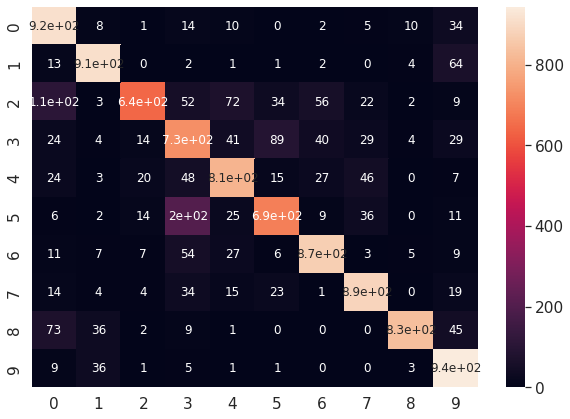

In [10]:
# Confusion matrix
print_cf(tl_model_vgg)

94781440/94765736 [==============================] - 5s 0us/step
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1, 1, 2048)        23587712  
                                                                 
 flatten_3 (Flatten)         (None, 2048)              0         
                                                                 
 dense_8 (Dense)             (None, 64)                131136    
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 128)               8320      
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                       

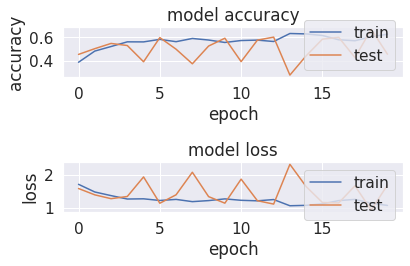

In [11]:
# Build Transfer learning Model 2 (ResNet)
from keras.applications.resnet import ResNet50

def resnet_model():
  
  resnet_model = ResNet50(include_top=False,weights='imagenet',input_shape=(32,32,3),classes=y_train.shape[1])

  model = Sequential()

  model.add(resnet_model)
  model.add(Flatten())
  
  model.add(Dense(64,activation=('relu'), input_dim=512))
  model.add(Dropout(0.3))

  model.add(Dense(128,activation=('relu')))
  model.add(Dropout(0.3))

  model.add(Dense(10,activation=('softmax')))
  
  # compile model
  adam=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
  model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

  return model

tl_model_resnet = resnet_model()
tl_model_resnet.summary()


# Fit model

resnet = tl_model_resnet.fit(X_train, y_train, epochs=20, validation_data=(X_test,y_test),shuffle=True)\

scores = tl_model_resnet.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

# Learning curves
print_learning_curve(vgg)

313/313 - 8s - 8s/epoch - 24ms/step
0 1000
1 1000
2 1000
3 1000
4 1000
5 1000
6 1000
7 1000
8 1000
9 1000
[[292  31   7  11   8   0   0   8 600  43]
 [ 27 716   0   4   0   1   0   0 199  53]
 [167  45 273  35 190  23  21  60 138  48]
 [107  73  30 146 155  16  20  89 238 126]
 [109  21  16   9 567   1   5 147  93  32]
 [ 91  46  52  98  85 104   5 174 198 147]
 [ 50 118  12  20 152   0 396  43  85 124]
 [109  31   5   6  50   6   2 652  35 104]
 [ 29  46   0   5   1   0   0   0 883  36]
 [ 43 218   0   2   2   0   0   9 174 552]]


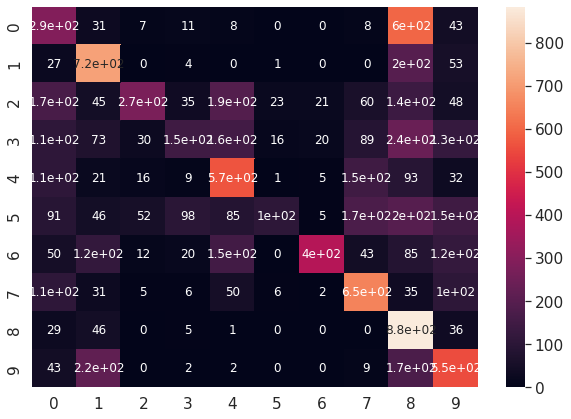

In [12]:
# Confusion matrix
print_cf(tl_model_resnet)